In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [2]:
Boston = load_data('Boston')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


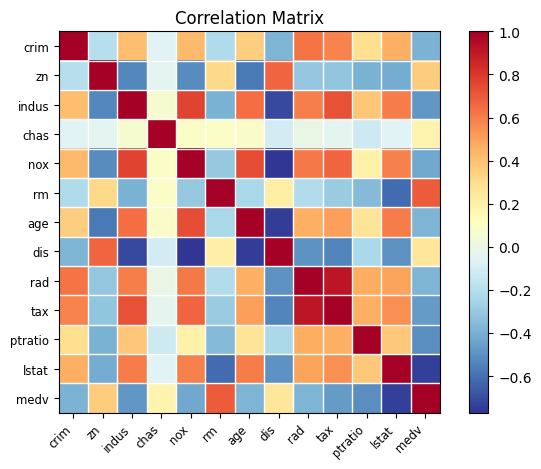

In [3]:

smg.plot_corr(Boston.corr().values, xnames=Boston.columns, ynames=Boston.columns);


In [4]:
y = Boston['crim']
y.head()

0    0.00632
1    0.02731
2    0.02729
3    0.03237
4    0.06905
Name: crim, dtype: float64

In [5]:
predictors = Boston.columns[Boston.columns != 'crim']

coefs = {}

for predictor in predictors:
    res = sm.OLS(y, MS([predictor]).fit_transform(Boston)).fit()
    coefs[predictor] = summarize(res)['coef'][1:][predictor]
    print(predictor)
    print(summarize(res))
    rse = np.sqrt(res.ssr / res.df_resid)
    print(f"rse: {rse:.3f}, r_sq: {res.rsquared:.3f}, f-statistic: {res.fvalue:.3f}")
    print('\n')

zn
             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0
rse: 8.435, r_sq: 0.040, f-statistic: 21.103


indus
             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000
rse: 7.866, r_sq: 0.165, f-statistic: 99.817


chas
             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209
rse: 8.597, r_sq: 0.003, f-statistic: 1.579


nox
              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0
rse: 7.810, r_sq: 0.177, f-statistic: 108.555


rm
              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0
rse: 8.401, r_sq: 0.048, f-statistic: 25.450


age
             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.4

In [6]:
X = MS(predictors).fit_transform(Boston)
res = sm.OLS(y, X).fit()
summarize(res)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


F-test

In [7]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           2.03e-56
Time:                        23:17:33   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
ft = res.f_test(f"chas = 0")
ft.fvalue

0.4864575237885911

In [9]:
alpha = 0.05
for name in predictors:
    ft = res.f_test(f"{name} = 0")
    pval = float(ft.pvalue)      # extract scalar from array
    sig  = "reject" if pval < alpha else "do not reject"
    print(f"{name:10s}  F = {ft.fvalue:.2f}, p = {pval:.3f} → {sig}")


zn          F = 5.92, p = 0.015 → reject
indus       F = 0.49, p = 0.486 → do not reject
chas        F = 0.49, p = 0.486 → do not reject
nox         F = 3.54, p = 0.060 → do not reject
rm          F = 1.07, p = 0.301 → do not reject
age         F = 0.00, p = 0.962 → do not reject
dis         F = 12.84, p = 0.000 → reject
rad         F = 48.95, p = 0.000 → reject
tax         F = 0.53, p = 0.466 → do not reject
ptratio     F = 2.66, p = 0.103 → do not reject
lstat       F = 3.36, p = 0.067 → do not reject
medv        F = 13.53, p = 0.000 → reject


In [17]:
bcoef = summarize(res)['coef'][1:]
bcoef

zn         0.0457
indus     -0.0584
chas      -0.8254
nox       -9.9576
rm         0.6289
age       -0.0008
dis       -1.0122
rad        0.6125
tax       -0.0038
ptratio   -0.3041
lstat      0.1388
medv      -0.2201
Name: coef, dtype: float64

In [18]:
acoef = pd.DataFrame({'coef':coefs})
acoef

,coef
zn,-0.0739
indus,0.5098
chas,-1.8928
nox,31.2485
rm,-2.6841
age,0.1078
dis,-1.5509
rad,0.6179
tax,0.0297
ptratio,1.1520


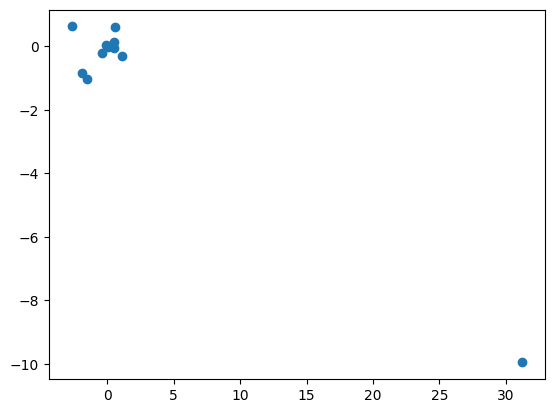

In [24]:
# simple vs multiple linear regression coefficients
plt.scatter(acoef, bcoef);